<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# get matplot to show charts inline
%matplotlib inline

chrome://settings/content/cookies

NOTE: Make sure third party cookies are not blocked.

In [5]:
df = pd.read_csv('Employee-attrition.csv')

In [6]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [7]:
df.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


# Accessing the main DataFrame components

In [4]:
columns = df.columns
index = df.index
data = df.values

In [5]:
columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [6]:
index

RangeIndex(start=0, stop=49653, step=1)

In [7]:
data

array([[1318, '12/31/2006 0:00', '1/3/1954', ..., 2006, 'ACTIVE',
        'HEADOFFICE'],
       [1318, '12/31/2007 0:00', '1/3/1954', ..., 2007, 'ACTIVE',
        'HEADOFFICE'],
       [1318, '12/31/2008 0:00', '1/3/1954', ..., 2008, 'ACTIVE',
        'HEADOFFICE'],
       ...,
       [8279, '12/1/2015 0:00', '7/18/1994', ..., 2015, 'TERMINATED',
        'STORES'],
       [8296, '12/1/2013 0:00', '9/2/1994', ..., 2013, 'TERMINATED',
        'STORES'],
       [8321, '12/1/2014 0:00', '11/28/1994', ..., 2014, 'TERMINATED',
        'STORES']], dtype=object)

# 1. Understanding Data Types

#### 1.A Find Shape of Data Frame

In [8]:
# A:
print(f'The number of rows and columns of the dataframe are {df.shape[0]} and {df.shape[1]} respectively')

The number of rows and columns of the dataframe are 49653 and 18 respectively


#### 1.B Find Data Types of Data Frame

In [11]:
# A:
df.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

#### 1.C Find Number of Data Types in a Data Frame



```
Expected Output:
int64      5
object    13
dtype: int64
```



In [20]:
df.dtypes.value_counts()

object    13
int64      5
dtype: int64

#### 1.D Use Info

Use info and explore difference.

In [26]:
# A:
print(df.info)

<bound method DataFrame.info of        EmployeeID   recorddate_key birthdate_key orighiredate_key  \
0            1318  12/31/2006 0:00      1/3/1954        8/28/1989   
1            1318  12/31/2007 0:00      1/3/1954        8/28/1989   
2            1318  12/31/2008 0:00      1/3/1954        8/28/1989   
3            1318  12/31/2009 0:00      1/3/1954        8/28/1989   
4            1318  12/31/2010 0:00      1/3/1954        8/28/1989   
...           ...              ...           ...              ...   
49648        8258   12/1/2015 0:00     5/28/1994        8/19/2013   
49649        8264    8/1/2013 0:00     6/13/1994        8/27/2013   
49650        8279   12/1/2015 0:00     7/18/1994        9/15/2013   
49651        8296   12/1/2013 0:00      9/2/1994        10/9/2013   
49652        8321   12/1/2014 0:00    11/28/1994       11/24/2013   

      terminationdate_key  age  length_of_service    city_name  \
0                1/1/1900   52                 17    Vancouver   
1      

In [25]:
df.diff

<bound method DataFrame.diff of        EmployeeID   recorddate_key birthdate_key orighiredate_key  \
0            1318  12/31/2006 0:00      1/3/1954        8/28/1989   
1            1318  12/31/2007 0:00      1/3/1954        8/28/1989   
2            1318  12/31/2008 0:00      1/3/1954        8/28/1989   
3            1318  12/31/2009 0:00      1/3/1954        8/28/1989   
4            1318  12/31/2010 0:00      1/3/1954        8/28/1989   
...           ...              ...           ...              ...   
49648        8258   12/1/2015 0:00     5/28/1994        8/19/2013   
49649        8264    8/1/2013 0:00     6/13/1994        8/27/2013   
49650        8279   12/1/2015 0:00     7/18/1994        9/15/2013   
49651        8296   12/1/2013 0:00      9/2/1994        10/9/2013   
49652        8321   12/1/2014 0:00    11/28/1994       11/24/2013   

      terminationdate_key  age  length_of_service    city_name  \
0                1/1/1900   52                 17    Vancouver   
1      

# 2. Selecting Column in Data Frame

#### 2.A Check Values of Job_Title column

In [28]:
# A:
df['job_title']

0                 CEO
1                 CEO
2                 CEO
3                 CEO
4                 CEO
             ...     
49648    Dairy Person
49649         Cashier
49650         Cashier
49651         Cashier
49652         Cashier
Name: job_title, Length: 49653, dtype: object

#### 2.B Find How Many Rows Are in Each Job Title



```
# Expected Output
Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
.
.
.
```



In [32]:
# A:

df.job_title.value_counts()

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Bakery Manager                      285
Meats Manager                       285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Compensation Analyst                 20
Auditor                              20
Systems Analyst                      20
Investment Analyst                   20
Corporate Lawyer                     17


#### 2.C [BONUS] Write A Function to Row Count



```
def row_count(column_name):
    number_of_rows = 0
    return number_of_rows
```



In [41]:
def row_count(col_name):
    number_of_rows = df.shape[0]
    number_of_nulls = df[col_name].isnull().sum()
    return number_of_rows-number_of_nulls
            
row_count('job_title')

49653

#### 2.D Describe 'Age'

Find count,  mean,  std, min, max of column 'age'

In [49]:
# A:
mean = np.mean(df['age'])
std  = np.std(df['age'])
dmin = np.min(df['age'])
dmax = np.max(df['age'])

print(f'mean: {mean}\nstd: {std}\nmin: {dmin}\nmax: {dmax}')

mean: 42.077034620264634
std: 12.427132257589273
min: 19
max: 65


##### 2.E [BONUS] Describe 'All Numeric Columns of Data Frame

Find count, mean, std, min, max of of all columns of dataframe

In [43]:
# A:
def is_numeric(item):
    t = type(item)
    return (t==int or t==float or t==complex or t==np.int64)

for name, col in df.iteritems():
    if is_numeric(col[0])==1:
        print(f'{name}: {np.mean(col)}')

EmployeeID: 4859.495740438644
age: 42.077034620264634
length_of_service: 10.434596096912573
store_name: 27.297605381346546
STATUS_YEAR: 2010.6126115239763


# 3. Making The Index Meaningful

In [50]:
# A:
df_index = df.set_index('EmployeeID')
df_index.head()

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


#### 3.A Find A Specifc Row Using Index

In [54]:
# A:
df.loc[1320,:]

EmployeeID                         1638
recorddate_key          12/31/2014 0:00
birthdate_key                  9/4/1950
orighiredate_key              7/16/1990
terminationdate_key            9/4/2015
age                                  64
length_of_service                    24
city_name                     Vancouver
department_name        Store Management
job_title                 Store Manager
store_name                           42
gender_short                          F
gender_full                      Female
termreason_desc          Not Applicable
termtype_desc            Not Applicable
STATUS_YEAR                        2014
STATUS                           ACTIVE
BUSINESS_UNIT                    STORES
Name: 1320, dtype: object

#### 3.B Sort Data Frame using Index

In [57]:
# A:
df_index.sort_values('EmployeeID')

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8335,12/31/2013 0:00,12/28/1994,12/10/2013,1/1/1900,19,0,Vancouver,Dairy,Dairy Person,35,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8335,12/31/2015 0:00,12/28/1994,12/10/2013,1/1/1900,21,2,Vancouver,Dairy,Dairy Person,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,STORES
8336,12/31/2015 0:00,12/31/1994,12/11/2013,1/1/1900,21,2,Vancouver,Dairy,Dairy Person,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,STORES


#### 3.C [BONUS] Sort Data Frame using Age

In [59]:
# A:
df.sort_values('age')

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
48132,8325,12/31/2013 0:00,12/7/1994,11/29/2013,1/1/1900,19,0,Cranbrook,Customer Service,Cashier,8,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
47925,8253,12/31/2013 0:00,5/15/1994,8/12/2013,1/1/1900,19,0,North Vancouver,Customer Service,Cashier,22,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
47922,8252,12/31/2013 0:00,5/10/1994,8/9/2013,1/1/1900,19,0,Victoria,Customer Service,Cashier,46,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
47919,8251,12/31/2013 0:00,5/7/1994,8/7/2013,1/1/1900,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
47916,8250,12/31/2013 0:00,4/26/1994,8/2/2013,1/1/1900,19,0,Burnaby,Dairy,Dairy Person,5,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48635,3262,8/1/2008 0:00,8/23/1943,2/28/1995,8/23/2008,65,13,Nanaimo,Meats,Meat Cutter,18,F,Female,Retirement,Voluntary,2008,TERMINATED,STORES
48634,3248,8/1/2008 0:00,8/14/1943,2/19/1995,8/14/2008,65,13,Vancouver,Dairy,Dairy Person,35,F,Female,Retirement,Voluntary,2008,TERMINATED,STORES
49127,4948,7/1/2013 0:00,7/9/1948,1/14/2000,7/9/2013,65,13,Burnaby,Produce,Produce Clerk,5,F,Female,Retirement,Voluntary,2013,TERMINATED,STORES
48651,3356,11/1/2008 0:00,11/18/1943,5/26/1995,11/18/2008,65,13,Nanaimo,Meats,Meat Cutter,18,F,Female,Retirement,Voluntary,2008,TERMINATED,STORES


#### 3.D [BONUS] Using Sample Select Any Row 

In [60]:
# A:
df.sample(1)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
40022,6770,12/31/2007 0:00,12/20/1982,8/5/2007,1/1/1900,25,0,Vancouver,Customer Service,Cashier,43,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,STORES


# 4. Query Data Frame

#### 4.A Find Rows Where Job_Title is CEO

In [64]:
# A:
df[df.job_title == 'CEO'].index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

#### 4.B Group By Age

In [66]:
# A:
df_group = df.groupby('age')
for name, group in df_group:
    print(name)
    print(group.head())

19
       EmployeeID   recorddate_key birthdate_key orighiredate_key  \
47492        8088  12/31/2012 0:00      1/1/1993       11/21/2012   
47496        8089  12/31/2012 0:00      1/6/1993       11/23/2012   
47500        8090  12/31/2012 0:00      1/6/1993       11/23/2012   
47504        8091  12/31/2012 0:00      1/6/1993       11/23/2012   
47508        8092  12/31/2012 0:00     1/12/1993       11/26/2012   

      terminationdate_key  age  length_of_service        city_name  \
47492            1/1/1900   19                  0  New Westminster   
47496            1/1/1900   19                  0         Victoria   
47500            1/1/1900   19                  0          Nanaimo   
47504            1/1/1900   19                  0    Prince George   
47508            1/1/1900   19                  0  New Westminster   

        department_name job_title  store_name gender_short gender_full  \
47492  Customer Service   Cashier          21            F      Female   
47496  Custom

68  Not Applicable  Not Applicable         2014  ACTIVE    HEADOFFICE  
51
    EmployeeID   recorddate_key birthdate_key orighiredate_key  \
12        1319  12/31/2008 0:00      1/3/1957        8/28/1989   
20        1320  12/31/2006 0:00      1/2/1955        8/28/1989   
34        1321  12/31/2010 0:00      1/2/1959        8/28/1989   
43        1322  12/31/2009 0:00      1/9/1958        8/31/1989   
57        1323  12/31/2013 0:00      1/9/1962        8/31/1989   

   terminationdate_key  age  length_of_service  city_name department_name  \
12            1/1/1900   51                 19  Vancouver       Executive   
20            1/1/1900   51                 17  Vancouver       Executive   
34            1/1/1900   51                 21  Vancouver       Executive   
43            1/1/1900   51                 20  Vancouver       Executive   
57            1/1/1900   51                 24  Vancouver       Executive   

                    job_title  store_name gender_short gender_ful

# 5. Visualization

> Indented block



#### 5.A Plot Histogram of Age 

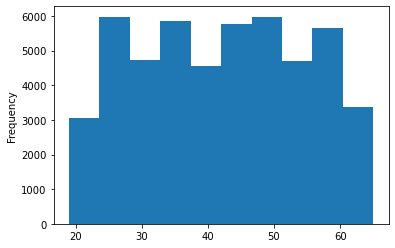

In [69]:
# A:
df.age.plot.hist()
plt.show()

#### 5.B BoxPlot of Age

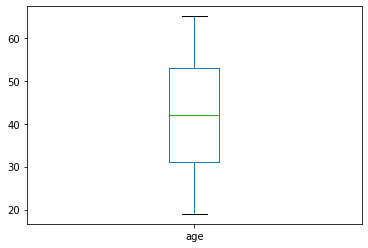

In [71]:
# A:
df.age.plot.box()
plt.show()

#### 5.C Scatterplot of age and length_of_service

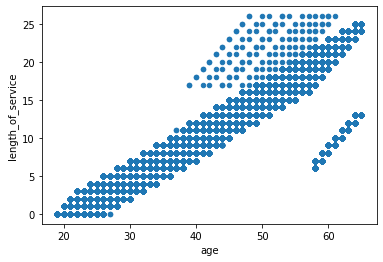

In [87]:
# A:
df.plot.scatter('age', 'length_of_service')
plt.show()

#### 5.D Plot Histogram of store_name

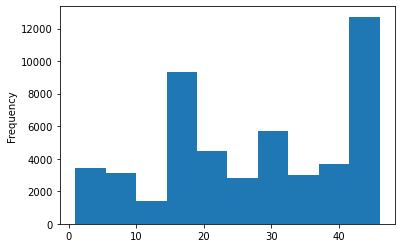

In [88]:
# A:
df.store_name.plot.hist()
plt.show()

#### 5.E Print Statistical Summary of Age

In [89]:
# A:
df.age.describe()

count    49653.000000
mean        42.077035
std         12.427257
min         19.000000
25%         31.000000
50%         42.000000
75%         53.000000
max         65.000000
Name: age, dtype: float64



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



